In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
tree = Tree("/uscms_data/d3/ekoenig/8BAnalysis/studies/eightbStudies/scripts/feynnet/feynnet_bkg_33sig.root", treename='tree', normalization=None)

100%|██████████| 1/1 [00:00<00:00, 44.99it/s]


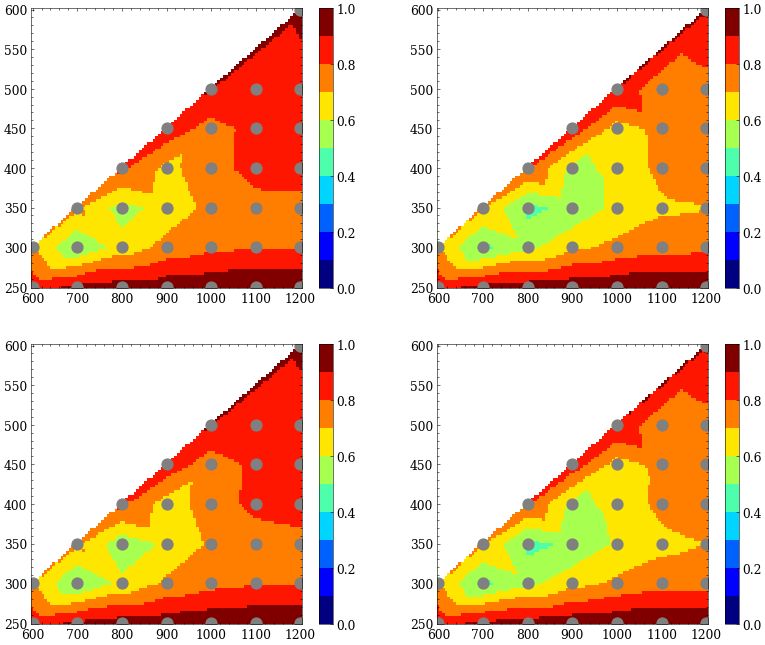

In [3]:
fig, axs = study.get_figax(nvar=4)
for i in range(4):
    study.mxmy_reduction(
        tree,
        f_var=lambda t : t.eightb_h_eff[:,i],
        zlim=np.linspace(0,1,11),
        g_cmap='jet',
        figax=(fig, axs.flat[i])
    )

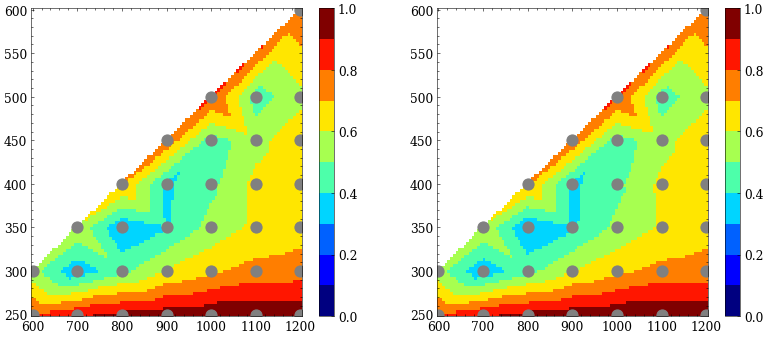

In [4]:
fig, axs = study.get_figax(nvar=2)
for i in range(2):
    study.mxmy_reduction(
        tree,
        f_var=lambda t : t.eightb_y_eff[:,i],
        zlim=np.linspace(0,1,11),
        g_cmap='jet',
        figax=(fig, axs.flat[i])
    )

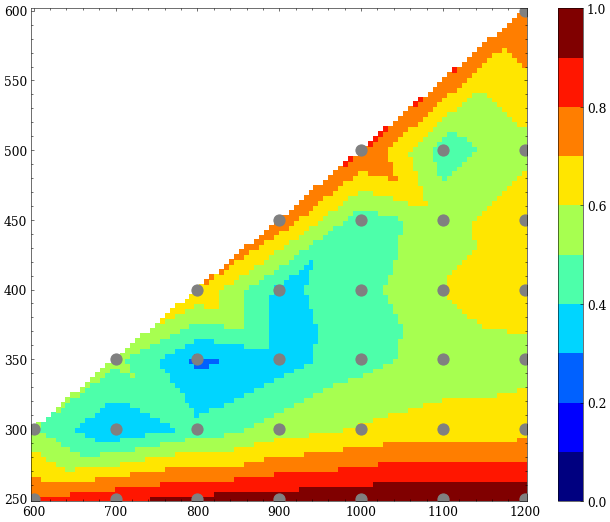

In [5]:
study.mxmy_reduction(
    tree,
    f_var=lambda t : t.eightb_x_eff,
    zlim=np.linspace(0,1,11),
    g_cmap='jet',
)

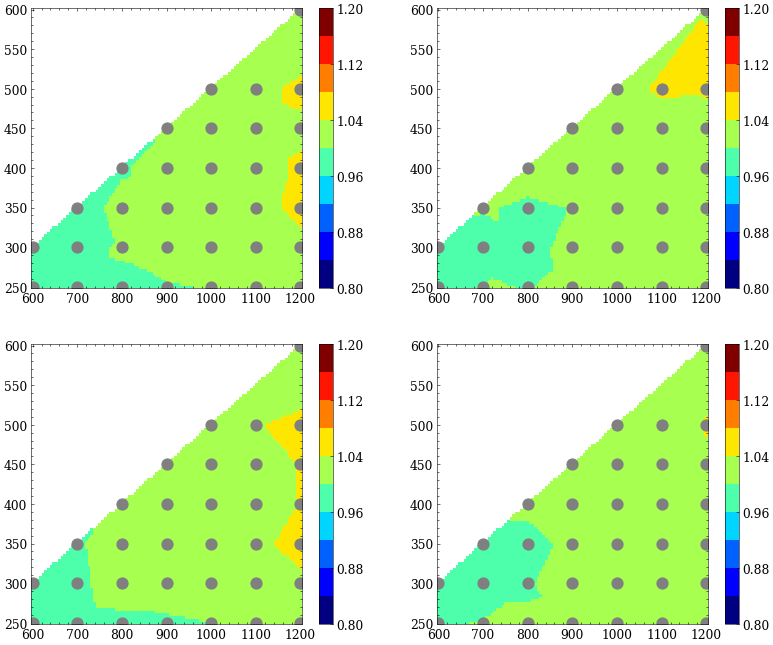

In [6]:
fig, axs = study.get_figax(nvar=4)
for i in range(4):
    study.mxmy_reduction(
        tree,
        f_var=lambda t : t.eightb_h_res[:,i],
        zlim=np.linspace(0.8,1.2,11),
        g_cmap='jet',
        figax=(fig, axs.flat[i])
    )

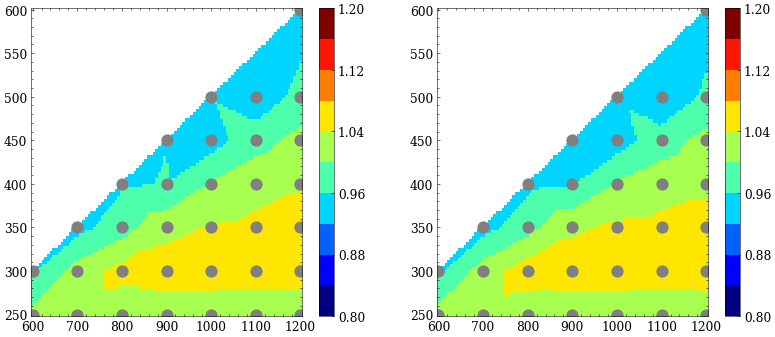

In [7]:
fig, axs = study.get_figax(nvar=2)
for i in range(2):
    study.mxmy_reduction(
        tree,
        f_var=lambda t : t.eightb_y_res[:,i],
        zlim=np.linspace(0.8,1.2,11),
        g_cmap='jet',
        figax=(fig, axs.flat[i])
    )

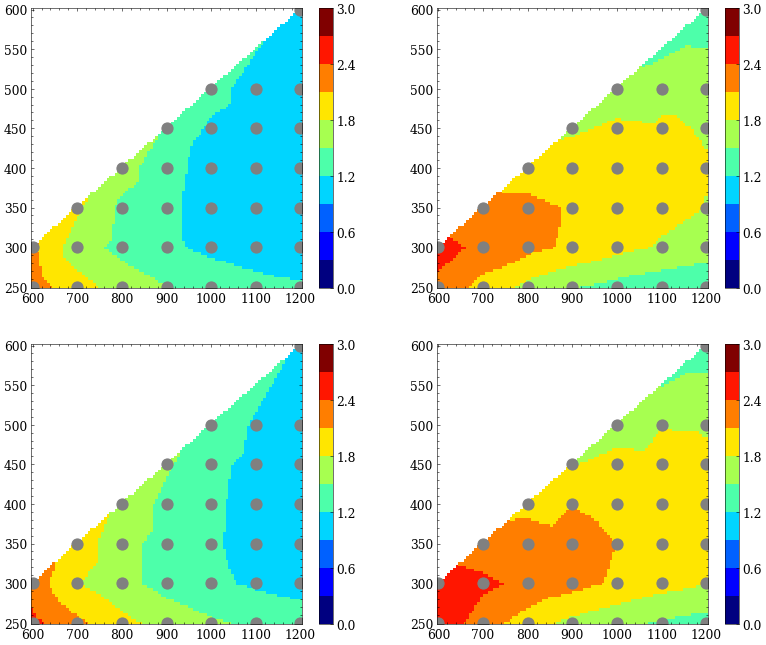

In [10]:
fig, axs = study.get_figax(nvar=4)
for i in range(4):
    study.mxmy_reduction(
        tree,
        f_var=lambda t : t.eightb_h_dr[:,i],
        zlim=np.linspace(0,3,11),
        g_cmap='jet',
        figax=(fig, axs.flat[i])
    )

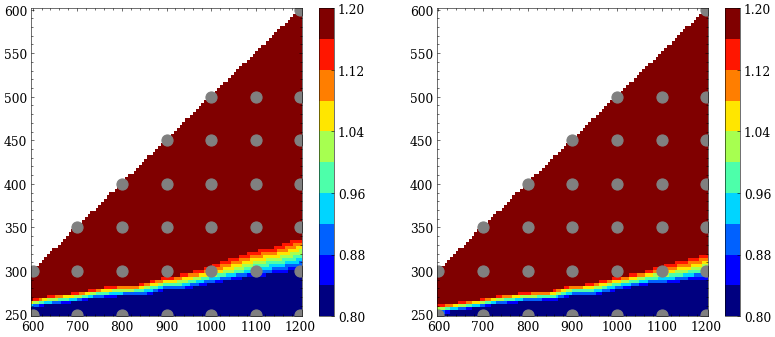

In [11]:
fig, axs = study.get_figax(nvar=2)
for i in range(2):
    study.mxmy_reduction(
        tree,
        f_var=lambda t : t.eightb_y_dr[:,i],
        zlim=np.linspace(0.8,1.2,11),
        g_cmap='jet',
        figax=(fig, axs.flat[i])
    )

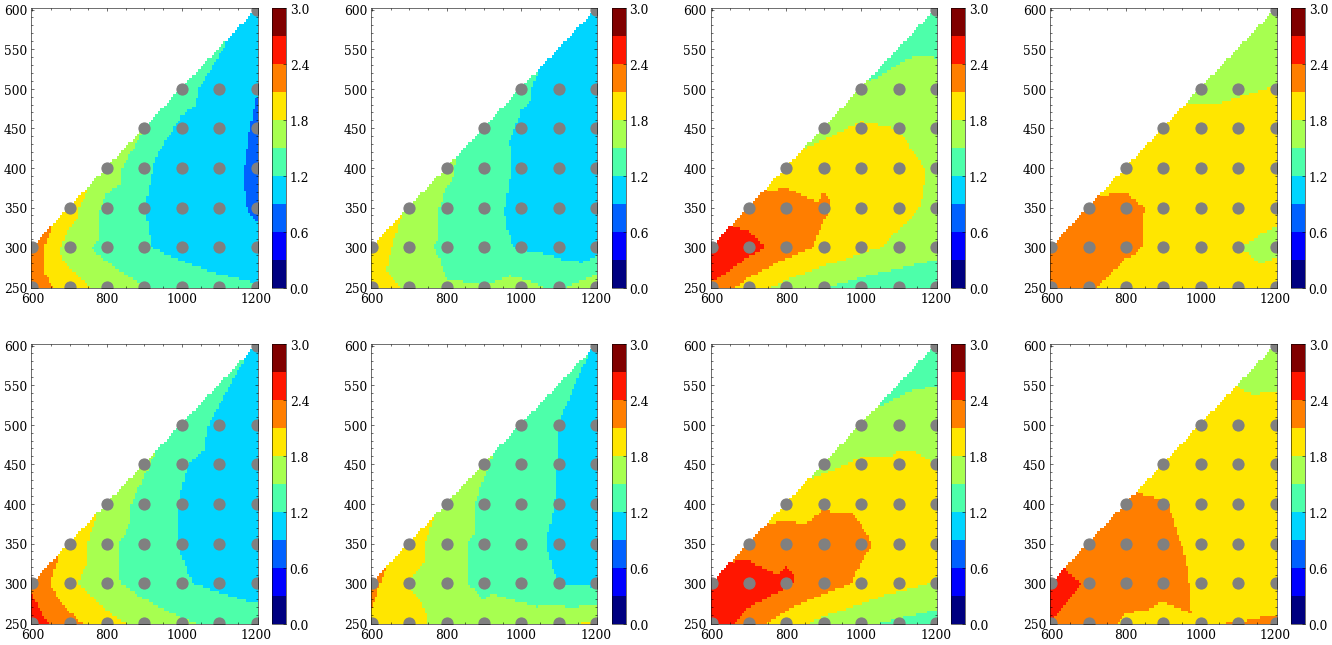

In [16]:
fig, axs = study.get_figax(nvar=8)
for i in range(4):
    study.mxmy_reduction(
        tree,
        f_var=lambda t : t.eightb_corr_h_dr[:,i],
        zlim=np.linspace(0,3,11),
        g_cmap='jet',
        figax=(fig, axs.flat[2*i])
    )
    
    study.mxmy_reduction(
        tree,
        f_var=lambda t : t.eightb_incorr_h_dr[:,i],
        zlim=np.linspace(0,3,11),
        g_cmap='jet',
        figax=(fig, axs.flat[2*i+1])
    )

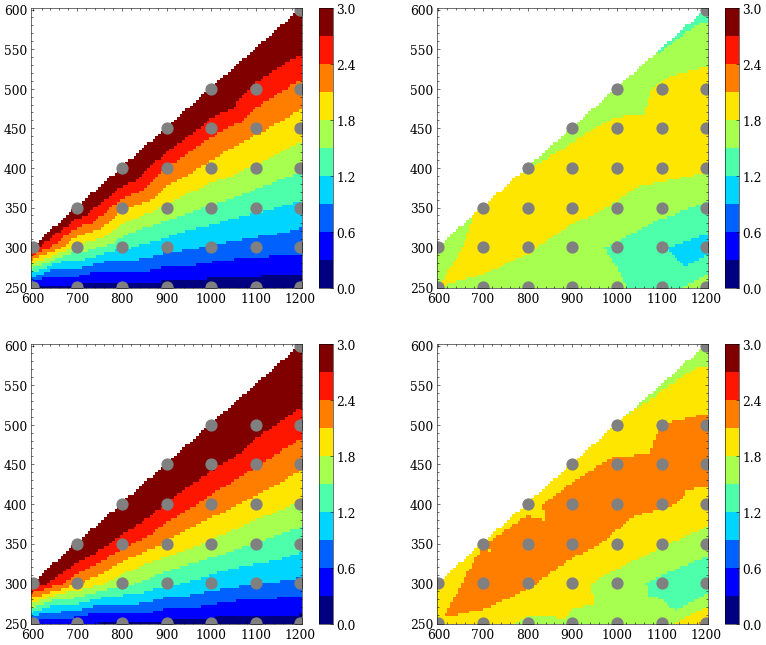

In [20]:
fig, axs = study.get_figax(nvar=4)
for i in range(2):
    study.mxmy_reduction(
        tree,
        f_var=lambda t : t.eightb_corr_y_dr[:,i],
        zlim=np.linspace(0,3,11),
        g_cmap='jet',
        figax=(fig, axs.flat[2*i])
    )
    study.mxmy_reduction(
        tree,
        f_var=lambda t : t.eightb_incorr_y_dr[:,i],
        zlim=np.linspace(0,3,11),
        g_cmap='jet',
        figax=(fig, axs.flat[2*i+1])
    )